#AMAZON PRODUCT ANALYZER

**1.loading of data**

In [101]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/asaikiran1999/amazon_product_analyser/main/reviews_28332.csv")

**2.checking the data**

In [2]:
df.head()

,Unnamed: 0,reviews.rating,reviews.text
0,0,3,I order 3 of them and one of the item is bad q...
1,1,4,Bulk is always the less expensive way to go fo...
2,2,5,Well they are not Duracell but for the price i...
3,3,5,Seem to work as well as name brand batteries a...
4,4,5,These batteries are very long lasting the pric...


**3.dropping unwanted column**

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

**4.reversing the column position**

In [4]:
df1 = df['reviews.rating']
df2 = df['reviews.text']
frames = [df2, df1]
df3 = pd.concat(frames,axis=1,join='inner')


In [5]:
df3.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


**5.Converting the ratings into ones and zeros**

In [6]:
for i in range(df3.shape[0]):
  if df3['reviews.rating'][i]>2:
    df3['reviews.rating'][i]=1
  else : 
    df3['reviews.rating'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


count of 1

In [7]:
df3[df3['reviews.rating']==1].count()

reviews.text      26751
reviews.rating    26751
dtype: int64

count of 0

In [8]:
df3[df3['reviews.rating']==0].count()

reviews.text      1581
reviews.rating    1581
dtype: int64

**6.Balancing the data**(Overfitting)

In [10]:
df4 = df3[df3['reviews.rating']==0]
df5 = df3[df3['reviews.rating']==1]

In [17]:
print(df4.shape)
print(df5.shape)
print(df4.shape[0]*17)

(1581, 2)
(26751, 2)
26877


In [18]:
df_final=df5
for _ in range(17):
  df_final = pd.concat([df_final,df4])
df_final.shape

(53628, 2)

In [19]:
df7=df_final

In [20]:
df7.tail()

,reviews.text,reviews.rating
28254,Freeze frequently... No way to trouble shoot o...,0
28265,"was cheap, can not run chrome stuff, returned ...",0
28268,Didn't have some of the features I was looking...,0
28269,My Hulu plays perfectly..great volume. Kindle ...,0
28285,Worked great but after awhile I wouldn't unloc...,0


In [21]:
df7.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,1
1,Bulk is always the less expensive way to go fo...,1
2,Well they are not Duracell but for the price i...,1
3,Seem to work as well as name brand batteries a...,1
4,These batteries are very long lasting the pric...,1


**7.renaming the data-column**

In [22]:
df7.rename(columns = {'reviews.rating':'reviews.sentiment'}, inplace = True)

**8.reindexing**

In [23]:
df8 = df7.reset_index()
df9 = df8.iloc[:,1:]

**9.Shufffling the data**

In [24]:
df9.head(10)

,reviews.text,reviews.sentiment
0,I order 3 of them and one of the item is bad q...,1
1,Bulk is always the less expensive way to go fo...,1
2,Well they are not Duracell but for the price i...,1
3,Seem to work as well as name brand batteries a...,1
4,These batteries are very long lasting the pric...,1
5,Bought a lot of batteries for Christmas and th...,1
6,ive not had any problame with these batteries ...,1
7,Well if you are looking for cheap non-recharge...,1
8,These do not hold the amount of high power jui...,1
9,AmazonBasics AA AAA batteries have done well b...,1


In [25]:
shuffled = df9.sample(frac=1,random_state=1).reset_index()
df10 = shuffled.iloc[:,1:]

In [26]:
df10.head(5)

,reviews.text,reviews.sentiment
0,I bought 2 of the Amazon Fire tablets because ...,0
1,You know these are just ok. They done last as ...,0
2,Great value for the price.,1
3,these batteries do not last long and we have q...,0
4,This is a great devise for reading books or ta...,1


#**DATA PREPARATON FOR SENTIMENTAL ANALYSIS**

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer


**1.lowering the text-data**

In [28]:
def preprocess_data(data):
    # Convert text to lowercase
    data['reviews.text'] = data['reviews.text'].str.strip().str.lower()
    return data
data = preprocess_data(df10)
data.head()

,reviews.text,reviews.sentiment
0,i bought 2 of the amazon fire tablets because ...,0
1,you know these are just ok. they done last as ...,0
2,great value for the price.,1
3,these batteries do not last long and we have q...,0
4,this is a great devise for reading books or ta...,1


****

**2.test and train split**

In [29]:
# Split into training and testing data
x = data['reviews.text']
y = data['reviews.sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

**3.converting the words into vectors**

In [30]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

**4.model building and fiting**

In [31]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

**5.testing and training data accuracy**

In [95]:
print("the test data acccuracy is : ",model.score(x_test, y_test))
print("the train data accuracy is : ",model.score(x,y))

the test data acccuracy is :  0.9113149847094801
the train data accuracy is :  0.9195693791800303


**6.manual testing**

In [96]:
model.predict(vec.transform(['it has low voice']))

array([0])

In [97]:
#joblib.dump(model, 'model1.pkl')

#**WEB SCRAPING**

**1.taking the url**

In [87]:
url = input("enter the url")
url_cut = url[:-1]
url_cut
product_name = url_cut.split('/')[3]
product_name

enter the urlhttps://www.amazon.in/Noise-Buds-VS103-HyperSync-Technology/product-reviews/B095YZB3MS/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2


'Noise-Buds-VS103-HyperSync-Technology'

**2.coverting the scraped reviews into a list**

In [88]:
import requests
from bs4 import BeautifulSoup as bs
reviews_list = []
for page in range(1,100):
  url = url_cut+str(page)
  code = requests.get(url)
  if str(code) == "<Response [200]>":
    soup = bs(code.content,'html.parser')
    reviews = soup.select('span.review-text-content span')
    for i in range(0,len(reviews)):
      reviews_list.append(reviews[i].get_text())

**3.checking the length of reviews**

In [89]:
len(reviews_list)

1003

**4.checking the first review in the list**

In [90]:
reviews_list[0]

"I'm using these for 2 days. It worked fine first few hours. It started disconnected and connecting frequently even when battery was 100%. I used on another phone and the same issue was happening. Just right now while writing this review right earbud stopped working and left is working okay. Overall completely dissatisfied. Sound quality is good hence one ⭐"

**5.listing the sentiments of the product**

In [91]:
sentiment = []
for i in range(len(reviews_list)):
  sentiment.append(int(model.predict(vec.transform([reviews_list[i]]))))

In [99]:
len(sentiment)

1003

**6.Counting the sentiments**

In [93]:
print(sentiment.count(1))
print(sentiment.count(0))

531
472


#SENTIMENT OF GIVEN PRODUCT

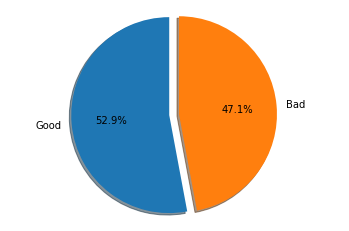

In [94]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Good', 'Bad'
sizes = [sentiment.count(1),sentiment.count(0)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
wings = 27.8
noise = 47